# FastAI Transfer Learning for Image Classification Problem Cats Vs Dogs.

**step 1:** download the data from kaggle 

In [1]:
from kaggle import api
import pathlib

In [2]:
path = pathlib.Path('/storage/archive/dogs-vs-cats')
path

PosixPath('/storage/archive/dogs-vs-cats')

In [3]:
if not path.exists():
    path.mkdir()
    api.competition_download_cli('dogs-vs-cats', path=path)

In [15]:
import zipfile
with zipfile.ZipFile(path/'dogs-vs-cats.zip', 'r') as zip_ref:
    zip_ref.extractall(path)
list(path.glob('*'))

[PosixPath('/storage/archive/dogs-vs-cats/dogs-vs-cats.zip'),
 PosixPath('/storage/archive/dogs-vs-cats/test1.zip'),
 PosixPath('/storage/archive/dogs-vs-cats/train.zip'),
 PosixPath('/storage/archive/dogs-vs-cats/sampleSubmission.csv')]

In [16]:
with zipfile.ZipFile(path/'test1.zip', 'r') as zip_ref:
    zip_ref.extractall(path)
with zipfile.ZipFile(path/'train.zip', 'r') as zip_ref:
    zip_ref.extractall(path)

In [19]:
list(path.joinpath('train').glob('*'))[0:10]

[PosixPath('/storage/archive/dogs-vs-cats/train/dog.10425.jpg'),
 PosixPath('/storage/archive/dogs-vs-cats/train/cat.2462.jpg'),
 PosixPath('/storage/archive/dogs-vs-cats/train/dog.5699.jpg'),
 PosixPath('/storage/archive/dogs-vs-cats/train/cat.11828.jpg'),
 PosixPath('/storage/archive/dogs-vs-cats/train/dog.10985.jpg'),
 PosixPath('/storage/archive/dogs-vs-cats/train/cat.10796.jpg'),
 PosixPath('/storage/archive/dogs-vs-cats/train/dog.6706.jpg'),
 PosixPath('/storage/archive/dogs-vs-cats/train/dog.5885.jpg'),
 PosixPath('/storage/archive/dogs-vs-cats/train/dog.12157.jpg'),
 PosixPath('/storage/archive/dogs-vs-cats/train/cat.7549.jpg')]

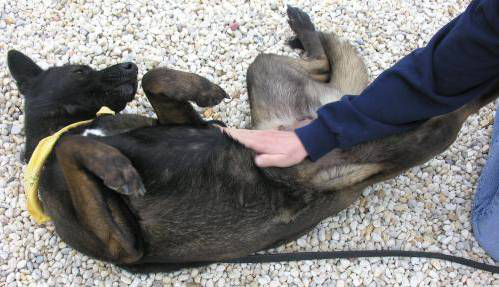

In [4]:
from PIL import Image
def show_image(path):
    image = Image.open(path)
    return image
show_image('/storage/archive/dogs-vs-cats/train/dog.10425.jpg')

**step 2**: Build Dataloaders from the images. 

The label of an image is determined by it's file name, all cats images have 'cat' in their name and dogs have 'dog'. 

split the data 0.8 for training and 0.2 for validation

transform each image to 224*224 size


In [5]:
from fastai.vision.all import *

def is_cat_dog(x):
    if x.startswith('cat'):
        return 'cat'
    else:
        return 'dog'
path_train = path.joinpath('train')

dls = ImageDataLoaders.from_name_func(
    path_train, get_image_files(path_train),
    valid_pct=0.2,
    label_func=is_cat_dog, 
    item_tfms=Resize(224))

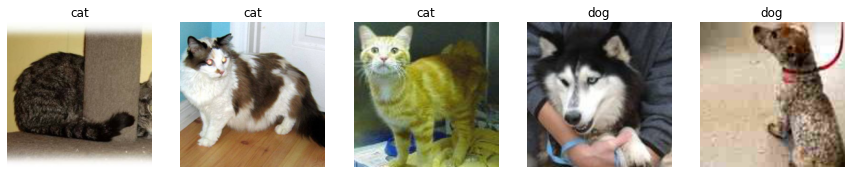

In [6]:
dls.show_batch(nrows=1, ncols=5)

**step 3:** train a model on our data

Load and use pretraind model resnet34. 

Use the default loss function (CrossEntropyLoss) and optimizer (Adam) 

for one epoch update only the last layer and for another 3 epochs update all the model.



In [7]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
print(learn.loss_func)
print(learn.opt_func)
learn.fine_tune(3)

FlattenedLoss of CrossEntropyLoss()
<function Adam at 0x7f1696d3d9d0>


epoch,train_loss,valid_loss,error_rate,time
0,0.085812,0.054957,0.018800,02:50


epoch,train_loss,valid_loss,error_rate,time
0,0.052742,0.042869,0.016400,03:55
1,0.028201,0.025027,0.009800,03:54
2,0.014395,0.022870,0.007600,03:53


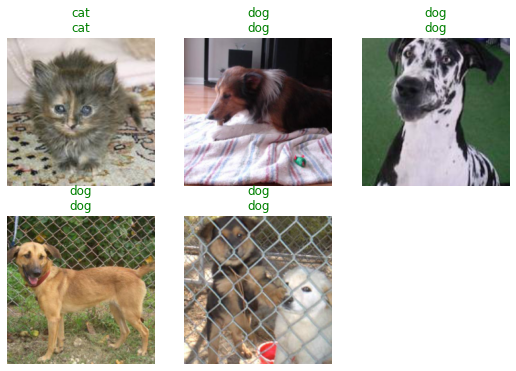

In [8]:
learn.show_results(max_n=5)

In [9]:
interp = ClassificationInterpretation.from_learner(learn)

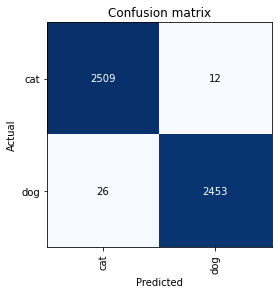

In [10]:
interp.plot_confusion_matrix()

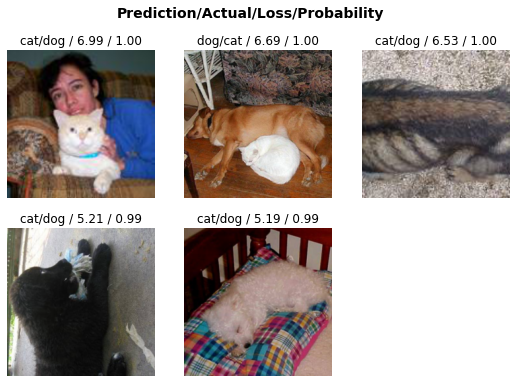

In [11]:
interp.plot_top_losses(5, nrows=2)

In [12]:
test_files = get_image_files(path.joinpath('test1'))
test_files

(#12500) [Path('/storage/archive/dogs-vs-cats/test1/6022.jpg'),Path('/storage/archive/dogs-vs-cats/test1/1332.jpg'),Path('/storage/archive/dogs-vs-cats/test1/3737.jpg'),Path('/storage/archive/dogs-vs-cats/test1/617.jpg'),Path('/storage/archive/dogs-vs-cats/test1/10239.jpg'),Path('/storage/archive/dogs-vs-cats/test1/4200.jpg'),Path('/storage/archive/dogs-vs-cats/test1/11815.jpg'),Path('/storage/archive/dogs-vs-cats/test1/2541.jpg'),Path('/storage/archive/dogs-vs-cats/test1/12155.jpg'),Path('/storage/archive/dogs-vs-cats/test1/1649.jpg')...]

In [14]:
pred,pred_idx,probs = learn.predict(test_files[0])
pred,pred_idx,probs

('dog', TensorImage(1), TensorImage([6.0620e-04, 9.9939e-01]))

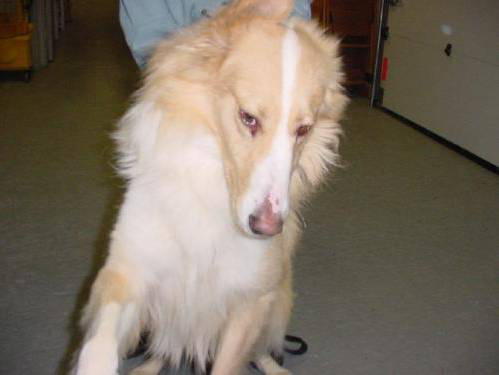

In [16]:
image = Image.open(test_files[0])
image

# Conclusion

In less then 20 lines of code we have outstanding model with more than 99% accurecy!